# Rocketrip Assessment
<h1> By: Sal Architetto </h1>

<h2><u> The Rocketrip Product</u></h2>
<p> The product itself is a way for organziations to better budget for their employees constant travel. With that being said, it uses a proprietary algorithm to determine how much the travel expense should cost <b>(Budget)</b> and that amount is how much the employee should beat for them to earn their savings <b>(Benchmark)</b>. If the employee beats the benchmark for the trip and saves their company money, they in return earn a percentage of the savings back for their own personal rewards (Amazon, BestBuy, Charity, Etc). Rocketrip calculates this budget number with a proprietary algorithm which checks for overal market prices, and availability. A win - win scenario for both the organization and the employee. </p>

<h2><u> What is A/B Testing?</u></h2>
    <p> Essentially, A/B testing is a statistical analysis to find which code, webpage (images, buttons, colors), functions, etc is worth utilizing in your product. Let's say you were creating a webpage and you wanted to see which page UI performed better relative with sales. In this specific case you chose to go with two buttons for checkout. One button is rectangular in shape, while the other button is rectangular but has curved edges. In this scenario you would deploy both versions of the webpage with a random set of end users and from the data feedback discern whether or not one did better than the other. Here we could check how many times which button was clicked the most, or check which button led to more checkout items being purchased on your webpage. The analysis would be completed and then you would utilize the button with the favorable outcomes.</p>
<p> In this scenario, we would like to see if the Rocketrip platform has an effect on the clients that use it. Does the Rocketrip platform help the client save money on travel expenses? I've been given a dataset which contains information on both Rocketrip and the control group. The control group is not using the Rocketrip platform and do not know that the team has created a budget to beat for them. </p>


<h3> Notes </h3>
<ul>
    <li> policy id - 280/345 = <b>standard group </b> | 314/346 = <b>executive group</b> </li>
    <li> a_group_flights|a_group_hotels = <b> Rocketrip </b> </li>
    <li> b_group_flights|b_group_hotels = <b> Control </b> </li>
    <li> Check to see which groups contained more savings: Rocketrip vs Control, using budget and spend columns within excel file 
    </li>
    <li>Average budget, Average spend, Average savings, Average percentage of savings: flights | hotels  </li>
    <li> columns to note </li>
    <ul>
       <li>policy_id</li>
       <li>budget_price </li>
        <li>total_spend </li>
        <li>flight_route</li>
        <li>check_in_date | check_out_date </li>
            <li>https://www.rocketrip.com/product/onboarding-budget-to-beat </li>
        <li> https://www.rocketrip.com/product/booking-travel-and-submitting-receipts</li>
    </ul>
</ul>

In [281]:
#imports needed

%matplotlib notebook

import pandas as pd
import numpy as np

import matplotlib as mpl
mpl.get_backend()

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import HTML

#Embedded JS to hide code
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Turn code on or off."></form>''')

# Step one: Read in the excel information.

In [212]:
#read in excel sheets corresponding groups
#check data, clean if necessary
#columns to note 

def read_excel(xlsx): 
    
    """
    Function returns several different dataframes with the input "xlsx"
    being the excel sheet the user provided. In this specific case read_excel
    will take return four dataframes corresponding to each sheet name 
    relative to the excel file
    
    """
    
    
    rt_flight = pd.read_excel(xlsx, sheet_name = "a_group_flights")
    rt_hotel = pd.read_excel(xlsx, sheet_name = "a_group_hotels")
    ct_flight = pd.read_excel(xlsx, sheet_name = "b_group_flights")
    ct_hotel = pd.read_excel(xlsx, sheet_name = "b_group_hotels")
    
    return rt_flight, rt_hotel, ct_flight, ct_hotel

rt_flight, rt_hotel, ct_flight, ct_hotel = read_excel("data.xlsx")

# Splitting overall data between the Rocketrip group and the Control Group 
<h2> This cell is also taking the mean for the budget price and total spend for both groups </h2>

In [213]:
#rocket trip flight data

def rt_bud_pr_spend(dataframe1, dataframe2):
    """
    dataframe1 == rt_flight
    dataframe2 == rt_hotel
    
    The rt_bud_pr_spend function takes in two dataframes, in this case it is 
    taking the rt_flight(rocketrip flight) and the rt_hotel(rocketrip hotel) 
    dataframes. It is creating variables and returning the mean for each specified
    column. In this case it would be only for the budget price and the total spend.
    
    This returns four values 
    """
    rt_flight_avb = dataframe1["budget_price"].mean()
    rt_hotel_avb = dataframe2["budget_price"].mean()
    
    rt_flight_ts = dataframe1["total_spend"].mean()
    rt_hotel_ts = dataframe2["total_spend"].mean()
    
    return rt_flight_avb, rt_hotel_avb, rt_flight_ts, rt_hotel_ts

#Control group data

def ct_bud_pr_spend(dataframe1, dataframe2):
    
    """
    ct_flight = dataframe1
    ct_hotel = dataframe2
    
    """
    
    ct_flight_avb = dataframe1["budget_price"].mean()
    ct_hotel_avb = dataframe2["budget_price"].mean()
    
    ct_flight_ts = dataframe1["total_spend"].mean()
    ct_hotel_ts = dataframe2["total_spend"].mean()
    
    return ct_flight_avb, ct_hotel_avb, ct_flight_ts, ct_hotel_ts
    
#avb = budget price
#ts = total spend
rt_flight_avb, rt_hotel_avb, rt_flight_ts, rt_hotel_ts = rt_bud_pr_spend(rt_flight, rt_hotel)
ct_flight_avb, ct_hotel_avb, ct_flight_ts, ct_hotel_ts = ct_bud_pr_spend(ct_flight, ct_hotel)

In [274]:
def create_graph(names, values, title):
    
    """
    create_graph takes in the names of the desired columns 
    ** in this case only two**
    and the given values you want to put into the graph
    **also only two values**
    This function also allows the user to add a title. 
    From there it creates a very minimalistic bar graph to 
    illustrate the difference between two values.
    
    
    """
    plt.figure()
    x_axis = [x for x in names]
    y_axis = values

    bars = plt.bar(x_axis, y_axis, align = "center", linewidth = 0, 
                   color = "lightslategrey", width = .5)
    
    bars[0].set_color('#ed591a')

    ax = plt.gca()
    ax.set_ylabel("Average Saving Percentage per Group",alpha=0.8)
    ax.set_title(title ,alpha=0.8)

    #removing the y ticks from the chart
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    #getting rid of the frame
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    # ax.set_xticklabels(x_axis, rotation=15)
    for bar in bars:
        plt.gca().text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2, str(int(bar.get_height())) + '%', 
                     ha='center', color='w', fontsize=13)
    plt.show()

# Savings Data for Flights:
<h2> Finding out which group did better overall, Rocketrip or the Control? </h2>


Rocketrip's average flight saving is: 6.7493125351773005%
Control Group Average flight saving is: 2.371155988857987%
----------------------------------------------------------------------------------------------------
Rocketrip performed 4.378156546319314% better than the control group in the flight category


<IPython.core.display.Javascript object>


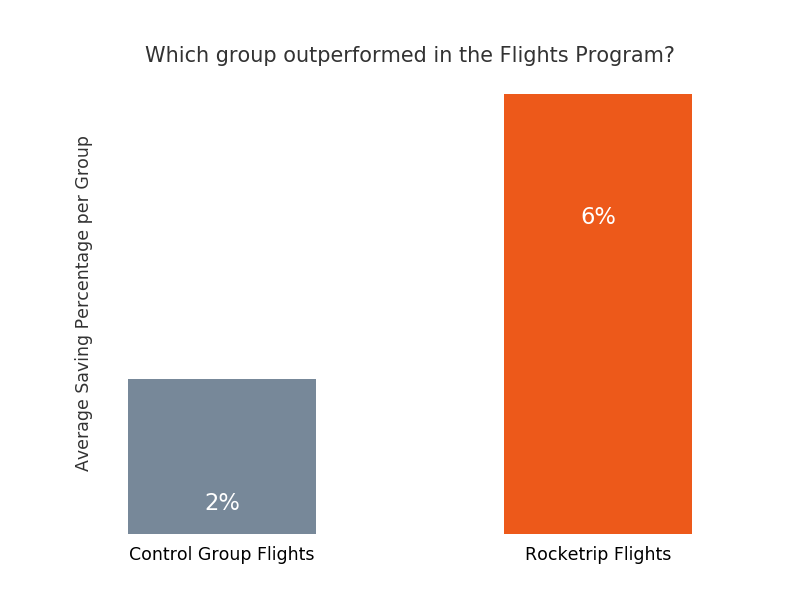

In [275]:
#Flight Data Rocketrip vs Control 

#Average Saving
rt_flight_saving = (rt_flight_avb - rt_flight_ts)
ct_flight_saving = (ct_flight_avb - ct_flight_ts)

#Percentage of Savings
#average savings - avg budget * 100 = percent savings

rt_av_flight_saving = (rt_flight_saving / rt_flight_avb) * 100
ct_av_flight_saving = (ct_flight_saving / ct_flight_avb) * 100

rt_ct_f_diff = (rt_av_flight_saving - ct_av_flight_saving)

print("Rocketrip's average flight saving is: " + str(rt_av_flight_saving) + "%")
print("Control Group Average flight saving is: " + str(ct_av_flight_saving) + "%")
print("--" * 50)
print("Rocketrip performed " + str(rt_ct_f_diff) + "% better than the control group in the flight category")

create_graph(["Rocketrip Flights", "Control Group Flights"],
            [rt_av_flight_saving, ct_av_flight_saving],
            "Which group outperformed in the Flights Program?")

# Savings Data for Hotels : 
<h2>Finding out which group did better overall, Rocketrip or the Control </h2> 

Rocketrip's average hotel saving is: 25.893371576919826%
Control Group Average hotel saving is: 11.56697151128371%
----------------------------------------------------------------------------------------------------
Rocketrip performed 14.326400065636117% better than the control group in the hotel category


<IPython.core.display.Javascript object>


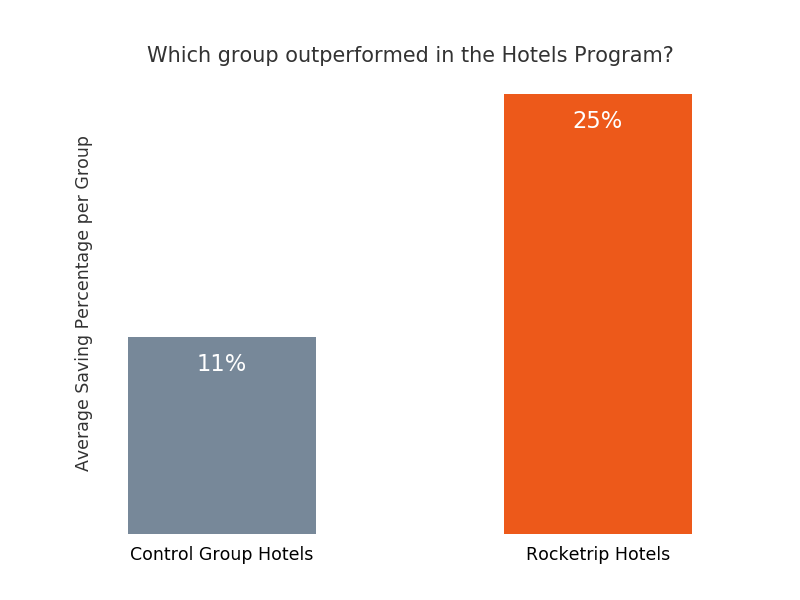

In [276]:
#Hotel Data Rocketrip vs Control 

#Average Saving
rt_hotel_saving = (rt_hotel_avb - rt_hotel_ts)
ct_hotel_saving = (ct_hotel_avb - ct_hotel_ts)

#Percentage of Savings
#average savings - avg budget * 100 = percent savings

rt_av_hotel_saving = (rt_hotel_saving / rt_hotel_avb) * 100
ct_av_hotel_saving = (ct_hotel_saving / ct_hotel_avb) * 100

rt_ct_h_diff  = (rt_av_hotel_saving - ct_av_hotel_saving)

print("Rocketrip's average hotel saving is: " + str(rt_av_hotel_saving) + "%")
print("Control Group Average hotel saving is: " + str(ct_av_hotel_saving) + "%")
print("--" * 50)
print("Rocketrip performed " + str(rt_ct_h_diff) + "% better than the control group in the hotel category")

create_graph(["Rocketrip Hotels", "Control Group Hotels"], 
             [rt_av_hotel_saving, ct_av_hotel_saving],
            "Which group outperformed in the Hotels Program?")

# Checking to see which programs did better within Rocketrip 

In [277]:
#rt flight vs rt hotel programs
flight_vs_hotel = (rt_av_hotel_saving - rt_av_flight_saving)
print("--" * 50)
print("RT Hotel program outperformed the RT flight program by: " +str(flight_vs_hotel) + "%")

----------------------------------------------------------------------------------------------------
RT Hotel program outperformed the RT flight program by: 19.144059041742526%


<h3> Question 1 </h3>
<h3> How would you characterize the success or failure of this A/B test in illustrating the impact of Rocketrip’s program? </h3> 
<p> Through the analysis I conducted with the data provided, I can conclude that the Rocketrip group did have a higher percentage of savings on both hotels and flights overall. With that being said, it's currently safe to assume that the clients who use Rocketrip will save money on their travel expenses relative to those who don't. Also, the hotel performance on the Rocketrip group performed much better than the control group. Here are the numbers:
<ul>
    <li>Rocketrip's average flight saving is: <b><font color = "green">6.74%</font></b></li>
    <li>Control Group Average flight saving is: <b>2.37%</b> </li>
    <li>--------------------------------------------------------------------------- </li>
    <li>Rocketrip's average hotel saving is: <b><font color = "green">25.89%</font></b></li>
    <li>Control Group Average hotel saving is: <b>11.56%</b> </li>
</ul>
    </p>

<p> The only problem I did have to consider though is that there weren't enough data points throughout this test. Within the sample guide you provided we see that it is recommended to have at least <b>2500 entries across all groups</b>. With the file I was provided this was not the case:
<ul> 
    <li> Rocketrip Flights = <b>333 entries</b>  </li>
    <li> Rocketrip Hotel = <b>370 entries</b> </li>
    <li> Control Group Flights = <b>993 entries</b> </li>
    <li> Control Group Hotel = <b>1055 entries</b> </li>
</ul>


# Standard vs Executive groups 

In [254]:
#First we want to separate the groups into two different dataframes
#policy id - 280/345 = standard group | 314/346 = executive group

#RT = 280(Standard)|314(Executive)
#CT = 345(Standard)|346(Executive)
#trail and error ^ 

#use read_excel() function from above

rt_flight, rt_hotel, ct_flight, ct_hotel = read_excel("data.xlsx")

In [255]:
ct_flight[ct_flight["policy_id"] == 346].head(1)
ct_flight[ct_flight["policy_id"] == 345].head(1)

,budget_id,trip_id,policy_id,budget_datetime,travel_mode,flight_route,budget_price,total_spend,first_name,last_name
0,324947,MQO62929,345,2017-04-19 08:08:43,flight,_:1:GOT:MXP:_:2017-04-28,430,227.0,Eup,Jan


In [256]:
standard = rt_flight[(rt_flight.policy_id == 280) & (rt_flight.policy_id == 345)]
standard #None

,budget_id,trip_id,policy_id,budget_datetime,travel_mode,flight_route,budget_price,total_spend,first_name,last_name


In [257]:
rt_flight[rt_flight["policy_id"] == 280].head(1)
rt_flight[rt_flight["policy_id"] == 314].head(1)

,budget_id,trip_id,policy_id,budget_datetime,travel_mode,flight_route,budget_price,total_spend,first_name,last_name
4,341626,AJT15921,314,2017-04-27 20:23:19,flight,_:1:NYC:IAH:_:2017-05-08@_:2:IAH:NYC:_:2017-05-11,660,483.4,Sey,Jff


In [258]:
def separate_rt(dataframef, dataframeh): 
    
    standard_rt_f = dataframef[dataframef["policy_id"] == 280].mean()
    executive_rt_f = dataframef[dataframef["policy_id"] == 314].mean()
    
    standard_rt_h = dataframeh[dataframeh["policy_id"] == 280].mean()
    executive_rt_h = dataframeh[dataframeh["policy_id"] == 314].mean()
    
    return standard_rt_f, executive_rt_f, standard_rt_h, executive_rt_h

def separate_ct(dataframef, dataframeh): 
    
    standard_ct_f = dataframef[dataframef["policy_id"] == 345].mean()
    executive_ct_f = dataframef[dataframef["policy_id"] == 346].mean()
    
    standard_ct_h = dataframeh[dataframeh["policy_id"] == 345].mean()
    executive_ct_h = dataframeh[dataframeh["policy_id"] == 346].mean()
    
    return standard_ct_f, executive_ct_f, standard_ct_h, executive_ct_h

In [259]:
rt_flight_stan, rt_flight_exec, rt_hotel_stan, rt_hotel_exec = separate_rt(rt_flight,rt_hotel)
ct_flight_stan, ct_flight_exec, ct_hotel_stan, ct_hotel_exec = separate_ct(ct_flight,ct_hotel)

In [260]:
def get_values(df):
    
    """
    Just grabbing the mean values for each column. 
    Had to separate the dataframes - no need to rewrite
    """
    
    df1 = df["budget_price"]
    df2 = df["total_spend"]
    
    return df1, df2

In [261]:
rt_flight_stan_avb ,rt_flight_stan_ts = get_values(rt_flight_stan)
rt_flight_exec_avb, rt_flight_exec_ts= get_values(rt_flight_exec)

rt_hotel_stan_abv, rt_hotel_stan_ts = get_values(rt_hotel_stan)
rt_hotel_exec_avb, rt_hotel_exec_ts = get_values(rt_hotel_exec)


ct_flight_stan_avb, ct_flight_stan_ts = get_values(ct_flight_stan)
ct_flight_exec_avb, ct_flight_exec_ts = get_values(ct_flight_exec)

ct_hotel_stan_avb, ct_hotel_stan_ts = get_values(ct_hotel_stan)
ct_hotel_exec_avb, ct_hotel_exec_ts = get_values(ct_hotel_exec)

In [262]:
def calc_data(avb, ts):
    
    """
    avb = average budget
    ts = total spend
    sav = savings 
    Quick calculation for grabbing the percent savings so we dont have to 
    re-write it in the future for all available variables
    """
    
    sav = (avb - ts)
    sav = (sav / avb) * 100
    sav = abs(sav)
    
#     print("The " + description + " group average saving is " + str(sav) + "%")
    return sav

# Standard Rocketrip flight vs Standard Control flight

The Rocketrip Standard Flight group average saving is 7.938272866632623%
----------------------------------------------------------------------------------------------------
The Control Standard Flight group average saving is 2.5224815016496898%


<IPython.core.display.Javascript object>


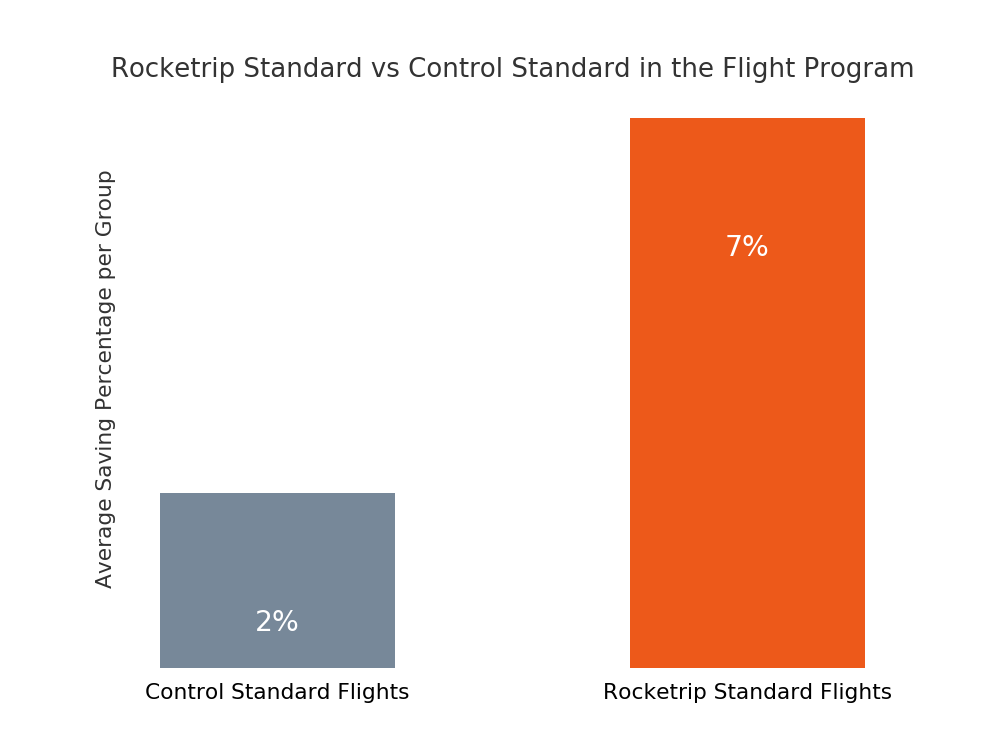

In [278]:
rt_standard_flight = calc_data(rt_flight_stan_avb, rt_flight_stan_ts)
ct_standard_flight = calc_data(ct_flight_stan_avb, ct_flight_stan_ts)

print("The Rocketrip Standard Flight" + " group average saving is " + str(rt_standard_flight) + "%")
print("--" * 50) 
print("The Control Standard Flight" + " group average saving is " + str(ct_standard_flight) + "%")


create_graph(["Rocketrip Standard Flights", "Control Standard Flights"], 
             [rt_standard_flight, ct_standard_flight],
            "Rocketrip Standard vs Control Standard in the Flight Program")

# Executive Rocketrip flights vs Executive Control flights

In [264]:
rt_flight_exec = calc_data(rt_flight_exec_avb, rt_flight_exec_ts)
ct_flight_exec = calc_data(ct_flight_exec_avb, ct_flight_exec_ts)
print("The Rocketrip Executive Flight" + " group average saving is " + str(rt_flight_exec) + "%")
print("--" * 50) 
print("The Control Executive Flight" + " group average saving is " + str(ct_flight_exec) + "%")

# create_graph(["Rocketrip Exec Flights", "Control Exec Flights"], 
#              [ct_flight_exec, rt_flight_exec],
#             "Rocketrip Executive vs Control Executive Flights Program")

The Rocketrip Executive Flight group average saving is 0.897759187331954%
----------------------------------------------------------------------------------------------------
The Control Executive Flight group average saving is 1.361920529801366%


# Standard Rocketrip hotels vs Standard Control hotels

The Rocketrip Standard Hotel group average saving is 25.49004264092592%
----------------------------------------------------------------------------------------------------
The Control Standard Hotel group average saving is 12.922024001432986%


<IPython.core.display.Javascript object>


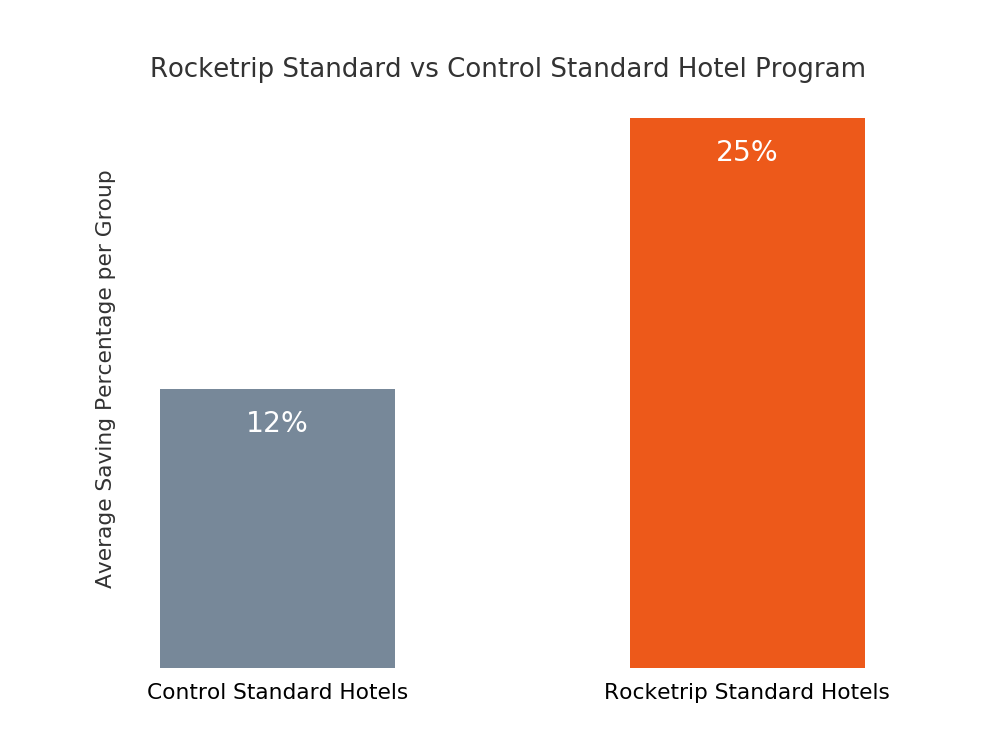

In [279]:
rt_standard_hotel = calc_data(rt_hotel_stan_abv, rt_hotel_stan_ts)
ct_standard_hotel = calc_data(ct_hotel_stan_avb, ct_hotel_stan_ts)

print("The Rocketrip Standard Hotel" + " group average saving is " + str(rt_standard_hotel) + "%")
print("--" * 50) 
print("The Control Standard Hotel" + " group average saving is " + str(ct_standard_hotel) + "%")

create_graph(["Rocketrip Standard Hotels", "Control Standard Hotels"], 
             [rt_standard_hotel, ct_standard_hotel],
            "Rocketrip Standard vs Control Standard Hotel Program ")

# Executive Rocketrip hotels vs Executive Control hotels

The Rocketrip Executive Hotel group average saving is 29.280794962613143%
----------------------------------------------------------------------------------------------------
The Control Executive Hotel group average saving is 3.667136528393089%


<IPython.core.display.Javascript object>


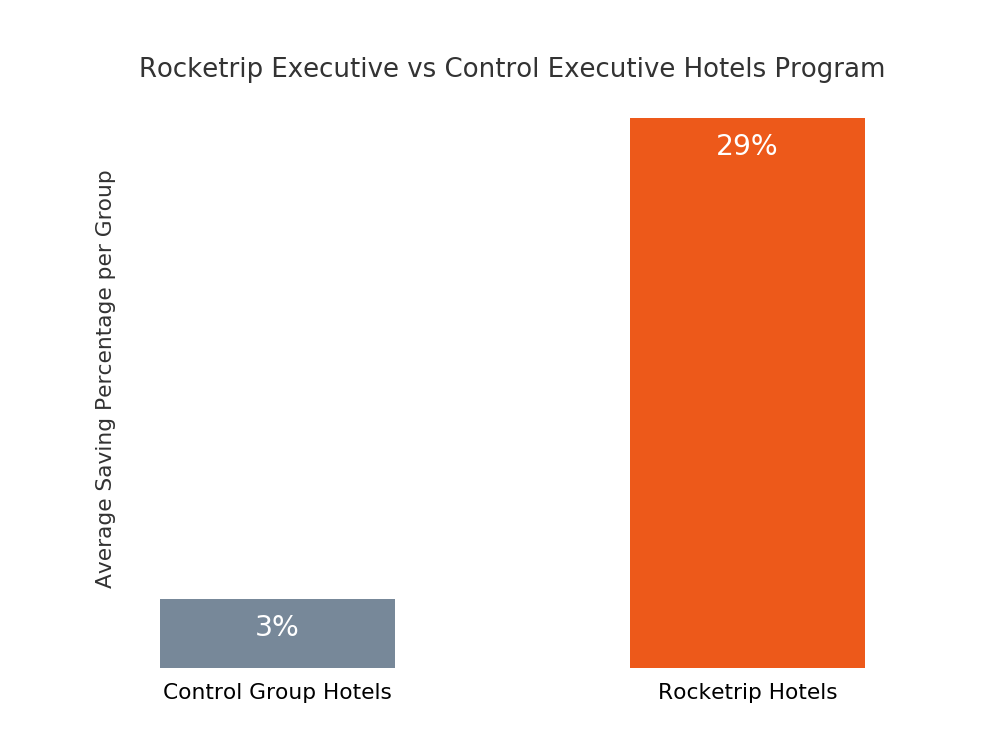

In [280]:
rt_exec_hotel = calc_data(rt_hotel_exec_avb, rt_hotel_exec_ts)
ct_exec_hotel = calc_data(ct_hotel_exec_avb, ct_hotel_exec_ts)

print("The Rocketrip Executive Hotel" + " group average saving is " + str(rt_exec_hotel) + "%")
print("--" * 50) 
print("The Control Executive Hotel" + " group average saving is " + str(ct_exec_hotel) + "%")

create_graph(["Rocketrip Hotels", "Control Group Hotels"], 
             [rt_exec_hotel, ct_exec_hotel],
            "Rocketrip Executive vs Control Executive Hotels Program")

<h3> Question 2 </h3>
<h3>How would you assess the performance of the travelers in the standard group vs the executive group? </h3>
<p> In the analysis I created above you can see that I separated the two groups by the numbers you have provided for the policy_id. From there I took the mean of both the budget_price and total_spend columns of both groups. I found that Rocketrip in this A/B test is overall still higher on savings overall. The only caveat is that the <b>Rocketrip executive group fell short by about 0.4%</b>. Here are the numbers: 
<ul>
    <li> The Rocketrip Standard flight  group average saving is: <b><font color = "green">7.93%</font></b></li>
    <li> The Control Standard flight  group average saving is:<b> 2.52%</b> </li>
    <li>--------------------------------------------------------------------------- </li>
    <li> The Rocketrip Executive flight  group average saving is: <b><font color = "red"> 0.89% </font></b></li>
    <li> The Control Executive flight  group average saving is: <b><font color = "green"> 1.36%</font></b></li>
    <li>--------------------------------------------------------------------------- </li>
    <li> The Rocketrip Standard Hotel group average saving is:<b><font color = "green"> 25.49% </font></b></li>
    <li> The Control Standard Hotel group average saving is:<b> 12.92% </b></li>
    <li>--------------------------------------------------------------------------- </li>
    <li> The Rocketrip Executive Hotel group average saving is:<b><font color = "green"> 29.28% </font></b></li>
    <li> The Control Executive Hotel group average saving is:<b> 3.66%</b></li>
</ul>
As mentioned in question one, the Rocketrip hotel group (Standard and Executive) did exceptionally well compared to the control group. The Rocketrip flight Standard group did just about the same as the overall analysis in question 1.</p>

<h3> Question 3 </h3>
<h3>How would you assess the performance of the flight program vs the hotel program? </h3>

<p> In this test we can conclude that the hotel program performed much better than the flight program did. In fact the Hotel program out performed the Flight program by <b><font color ="green">19% </font></b>in the overall analysis without the separation of standard and executive.</p>

<p> The hotel program in the in both the standard and executive group outperformed the standard and executive group in the flight program. The only case where Rocketrip fell short to the control group  was in the executive flight program, failing by <b><font color = "red">.4%</font></b></p>


<h3> Question 4 </h3>
<h3> We often look at our budget_price vs. the total_spend of B group users to determine how
effective our algorithms have been at predicting expected behavior without Rocketrip
(remember B group users do not know a budget is being generated). How effective have
we been in this particular test? Which areas might you suggest for additional configuration or algorithm calibration to improve? </h3>
<p> Effectiveness: </p>
<p> I believe for this specific test that the budget created for the B group was effective. Here are a few ways to calibrate the algorithm going forward:  </p>
<ul> 
    <li>As mentioned in question one, more data would have been useful in creating a more well rounded analysis (Maybe scraping more data from websites). As recommened in the example A/B test 2500 entries would have been keen for each group. </li>
    <li> Check specific air traffic times for each given area / airport.  </li>
    <li> Checking the length of the flight may determine whether or not the budget price would need to change </li>
    <li> Checking the individual rating of the airline the control group chose? Choosing an airline with a lesser or higher rating may impact the flights cost / same for the hotels. </li>
    <li> Something a bit more on the obscure side of things but what if Rocketrip sourced weather data? This may correspond with how much a flight or a hotel may cost on a specific day. </li>
    <li> Getting very granular here.. but Rocketrip could also potentially track the price of kerosone / gasoline and implement that as a variable in the algorithm.  </li>
    <li> For the hotel program you can track the location of the hotel and check if that comes into play regarding the stay per night. I.E Better socio-economic area would result in higher hotel price. </li>
    <li> Checking whether or not the flight / hotel was booked at the very last minute? This would either have spiked the price for the program, as from prior experience (especially with flights) that it becomes more expensive the later you wait to book. </li>
</ul>

<h3> Question 5 </h3>
<h3>What additional data elements do you think would be helpful to inform the analysis? </h3>
<p> Which specific websites did the client actually book with? From there we can check which sites cost more for the client to use and recommend an overall cheaper option. I feel as though this would be especially useful in the flight programs for Rocketrip.  </p>
<p> Some of the suggestions I mentioned in question 4 would be helpful in furthering the analysis. </p>
<p> One of the things I wish we had was coordinate data! (Espcially for the hotel information) One of the ideas I had if we were given the coordinate data was to create a heat map, showing where the most expensive places would be to stay in for each given state or country. </p>
<p> Tax and service fees would have been interesting to look at for both the flight and hotel programs.  </p>
<p>  Rental car data (if applicable) and the company's travel policy </p>
<p> Whether the client used a discount, or if there was a specific discount on the day the client booked. </p>
<p> If the client stayed with a friend or not.  </p>

<h3> Question 6 </h3>
<h3> What, if any, other insights were you able to derive from this data set? </h3>
<h3><u> Date time analysis </u> </h3>
<p> So after this quick analysis I've found that for the Rocketrip group the most optimal time to book their flights is in the morning. For the Control group it looks like the cheapest time to book their flight is the night time </p>
<p> Some things to consider is that the Control group does have more data points than the Rocketrip group which might skew the data. Also, this doesnt take into account what day they actually booked the flight (I.E - whether it was one day before the departure date or one week.) </p>

<h3><u> +- Hotel Prices </u></h3>
<p> Another small analysis I did was to find out which cities between both groups (Rocketrip and Control) had the highest and lowest budhet_spend and total_spend values (means). With that being said, it looks like Tel Aviv was the city with the most total spent value for Rocketrip. For the control group the number one total spender was The Woodlands, Texas.</p>

# Finding out the most money spent and least spent by the Hotel Program for both groups.
<p> *Ascending by total_spend* </p>

In [267]:
rt_flight, rt_hotel, ct_flight, ct_hotel = read_excel("data.xlsx")

In [268]:
rt_h_grouped = rt_hotel.groupby(["country", "state", "city", "policy_id"])["budget_price", "total_spend"].mean()
rt_h_grouped = pd.DataFrame(rt_h_grouped)
rt_h_grouped = rt_h_grouped.reset_index()

ct_h_grouped = ct_hotel.groupby(["country", "state", "city", "policy_id"])["budget_price", "total_spend"].mean()
ct_h_grouped = pd.DataFrame(ct_h_grouped)
ct_h_grouped = ct_h_grouped.reset_index()

In [269]:
rt_h_grouped = rt_h_grouped.sort_values(by = "total_spend", ascending = False)
ct_h_grouped = ct_h_grouped.sort_values(by = "total_spend", ascending = False)

In [270]:
rt10_h = rt_h_grouped.head(10)
ct10_h = ct_h_grouped.head(10)

rt10_neg = rt_h_grouped.tail(10)
ct10_neg = ct_h_grouped.tail(10)

In [271]:
#Rocketrip most spent
rt10_h

,country,state,city,policy_id,budget_price,total_spend
25,Israel,Tel Aviv District,Tel Aviv-Yafo,280,1295.000000,1654.650000
27,Italy,Lombardy,Milan,280,1880.000000,1456.680000
124,United States,Texas,Austin,280,1606.666667,1331.710000
84,United States,Massachusetts,Boston,314,1995.000000,1259.235000
17,Germany,Berlin,Berlin,314,560.000000,1162.090000
24,India,Telangana,Hyderabad,280,1000.000000,1103.650000
46,United States,California,Napa,280,930.000000,1098.490000
80,United States,Kentucky,Erlanger,280,1590.000000,1091.880000
82,United States,Maryland,Baltimore,280,740.000000,1057.990000
8,China,Beijing,Beijing,280,1743.333333,1055.703333


In [272]:
#control group most spent
ct10_h

,country,state,city,policy_id,budget_price,total_spend
272,United States,Texas,The Woodlands,345,1820.000000,2525.830000
2,Australia,New South Wales,The Rocks,345,1870.000000,1748.230000
57,Israel,Tel Aviv District,Tel Aviv-Yafo,345,1320.000000,1654.650000
61,Italy,Lombardy,Milan,345,1730.000000,1468.883333
115,United States,California,Menlo Park,346,1010.000000,1409.106667
90,Switzerland,Lucerne,Lucerne,345,1885.000000,1326.990000
37,France,?le-de-France,Puteaux,345,1480.000000,1168.080000
273,United States,Texas,The Woodlands,346,600.000000,1165.410000
86,Saudi Arabia,Riyadh Province,Riyadh,345,448.333333,1164.251667
48,Germany,Berlin,Berlin,346,705.000000,1125.580000


In [273]:
#rt least spent
rt10_neg

,country,state,city,policy_id,budget_price,total_spend
47,United States,California,Oakland,280,330.0,138.74
33,Oman,Muscat Governorate,Muscat,280,130.0,133.26
61,United States,Colorado,Greenwood Village,280,190.0,131.86
123,United States,Texas,Arlington,280,185.0,127.33
45,United States,California,Menlo Park,314,515.0,123.48
20,Germany,Rhineland-Palatinate,Mainz,280,140.0,119.02
115,United States,Ohio,Toledo,280,130.0,116.10
105,United States,New York,Syracuse,280,440.0,0.00
91,United States,Michigan,Ann Arbor,280,460.0,0.00
73,United States,Georgia,Atlanta,314,320.0,0.00


In [283]:
#Control least spent
ct10_neg

,country,state,city,policy_id,budget_price,total_spend
69,Mexico,Guanajuato,Leon,345,110.0,106.200000
235,United States,Ohio,Fremont,345,100.0,106.000000
10,Canada,Alberta,Calgary,345,160.0,104.553333
169,United States,Illinois,Quincy,345,100.0,101.890000
225,United States,North Carolina,Boone,345,130.0,100.780000
104,United States,California,Bakersfield,345,110.0,94.930000
71,Mexico,Quer?taro,Juriquilla,345,100.0,84.030000
219,United States,New York,Niagara Falls,345,250.0,63.270000
59,Italy,Lombardia,Case Nuove,345,90.0,59.810000
278,United States,Virginia,Colonial Heights,345,120.0,54.230000


<h1> Date time fun!  </h1>
<p> I thought it would be interesting to see if the time of day the 
client ordered their flight ticket had anything to with price values</p>

In [239]:
rt_flight["time"] = rt_flight["budget_datetime"].dt.time
ct_flight["time"] = ct_flight["budget_datetime"].dt.time

<h3> Grabbing the specific hour for each flight booked and 
putting it into the exitsting dataframe</h3> 

In [240]:
time = list(rt_flight["time"])
time2 = list(ct_flight["time"])

empty = []
empty2 = []
for x in time:
    x = x.hour
    empty.append(x)
for x in time2:
    x = x.hour
    empty2.append(x)
rt_flight["hour"] = empty
ct_flight["hour"] = empty2

<h3> Creating a function to determine whether the hour falls into
morning, afternoon, or night times</h3>

In [241]:
#Checking to see what time of day people are ordering their flights
def timeofday(column):
    
    if column <= 6:
        return "Night"
    elif (column > 6 and column <= 11):
        return "Morning"
    elif (column >= 12 and column <= 15):
        return "Afternoon"
    elif (column >= 16): 
        return "Night"
    

In [242]:
rt_flight["Time of Day"] = rt_flight["hour"].apply(lambda x: timeofday(x))
ct_flight["Time of Day"] = ct_flight["hour"].apply(lambda x: timeofday(x))

In [243]:
rt_times = rt_flight.groupby(["Time of Day"])["budget_price","total_spend"].mean()
rt_times = rt_times.reset_index()
rt_times

,Time of Day,budget_price,total_spend
0,Afternoon,697.674419,655.820349
1,Morning,458.750000,428.047500
2,Night,774.351464,720.195941


In [244]:
ct_times = ct_flight.groupby(["Time of Day"])["budget_price", "total_spend"].mean()
ct_times = ct_times.reset_index()
ct_times 

,Time of Day,budget_price,total_spend
0,Afternoon,729.909502,731.931946
1,Morning,1014.210526,960.500000
2,Night,705.926431,684.903460
